In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

D:\Anaconda\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
filename = "data.csv"
raw = pd.read_csv(filename)
test_shot_id=raw
print(raw.shape)
raw.head()

(30697, 25)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
kobe = raw[pd.notnull(raw['shot_made_flag'])]
print(kobe.shape)

(25697, 25)


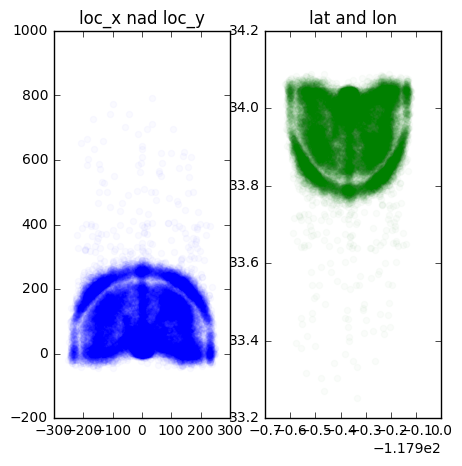

In [4]:
alpha = 0.02
plt.figure(figsize=(5,5))#图占的位置
plt.subplot(121)#一行两列第一个位置
plt.scatter(kobe.loc_x,kobe.loc_y,color='blue',alpha=alpha)#alpha透明度
plt.title('loc_x nad loc_y')

plt.subplot(122)
plt.scatter(kobe.lon,kobe.lat,color='green',alpha = alpha)
plt.title('lat and lon')

([<matplotlib.axis.XTick at 0x2c71d529da0>,
 <a list of 6 Text xticklabel objects>)

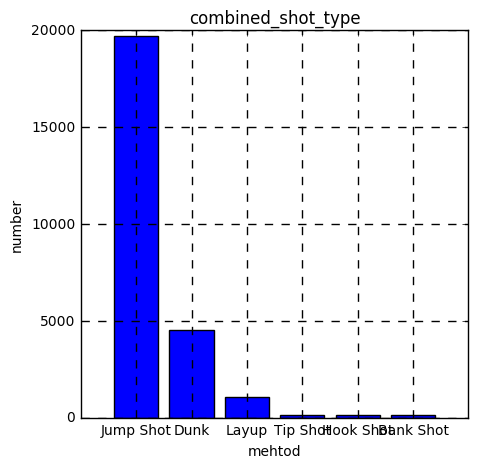

In [5]:
attack_method = kobe['combined_shot_type'].value_counts()
a = np.array([1,2,3,4,5,6])
plt.figure(figsize=(5,5))
plt.bar(a,attack_method,align='center')
plt.xlabel('mehtod')
plt.ylabel('number')
plt.title('combined_shot_type')
plt.grid(linestyle='--',linewidth=1)
plt.ylim(0,20000)
plt.xticks(a,kobe.combined_shot_type.unique())

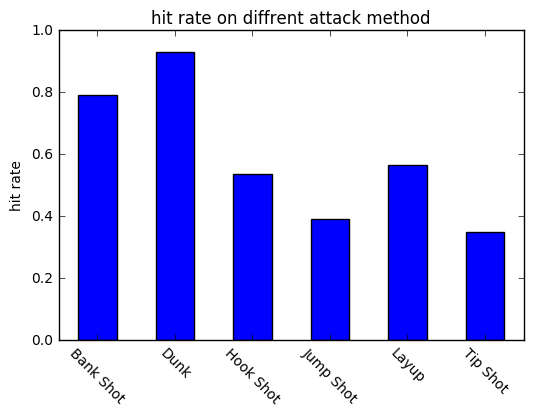

In [6]:
hits_df = kobe[kobe['shot_made_flag']==1]['combined_shot_type'].value_counts()
hits_df = hits_df/attack_method
df_plot = hits_df.plot.bar(rot=-45)
df_plot.set_ylabel('hit rate')
df_plot.set_title('hit rate on diffrent attack method')

In [7]:
raw['dist'] = np.sqrt(raw['loc_x']**2+raw['loc_y']**2)#距离

loc_x_zero = raw['loc_x'] == 0
raw['angle'] = np.array([0]*len(raw))
raw['angle'][~loc_x_zero]=np.arctan(raw['loc_y'][~loc_x_zero]/raw['loc_x'][~loc_x_zero])
raw['angle'][loc_x_zero]=np.pi/2

D:\Anaconda\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
raw['remaining_time'] = raw['minutes_remaining']*60 +raw['seconds_remaining']

In [9]:
print(kobe.action_type.unique())
print(kobe.combined_shot_type.unique())
print(kobe.shot_type.unique())
print(kobe.shot_type.value_counts())

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving Bank shot' 'Driving Jump shot'
 'Putback Layup Shot' 'Putback Dun

In [10]:
kobe['season'].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [11]:
raw['season'] = raw['season'].apply(lambda x:int(x.split('-')[1]))
raw['season'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0], dtype=int64)

In [12]:
print(kobe['team_id'].unique())
print(kobe['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


In [13]:
pd.DataFrame({'matchup':kobe.matchup,'opponent':kobe.opponent}).head(10)

,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR
6,LAL @ POR,POR
8,LAL @ POR,POR
9,LAL @ POR,POR
10,LAL @ POR,POR
11,LAL vs. UTA,UTA


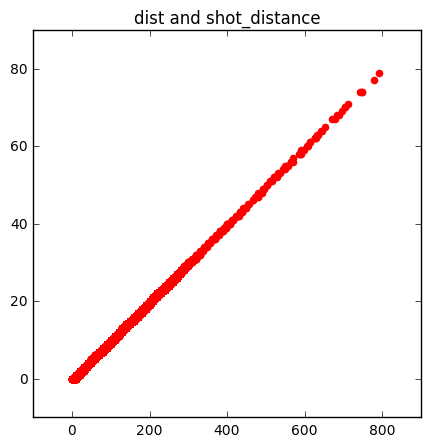

In [14]:
plt.figure(figsize=(5,5))

plt.scatter(raw.dist,raw.shot_distance,color='R')
plt.title('dist and shot_distance')

In [15]:
gs = kobe.groupby('shot_zone_area')
print(kobe['shot_zone_area'].value_counts())
print(len(gs))

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64
6


6
7
5


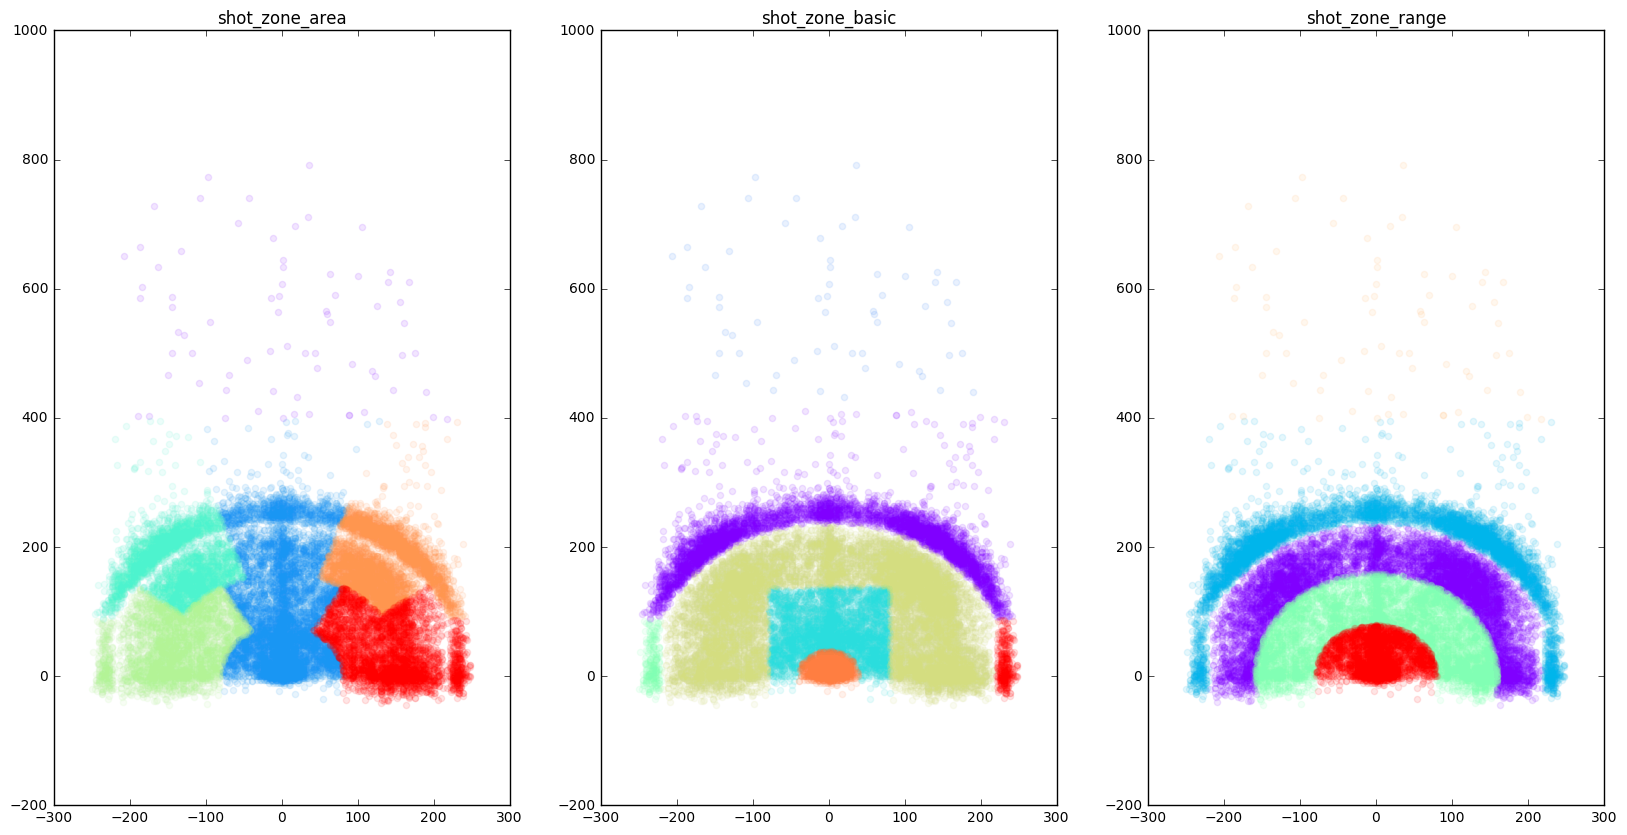

In [16]:
import matplotlib.cm as cm
plt.figure(figsize=(20,10))

def scatter_plot_by_category(feat):
    alpha =0.1
    gs = kobe.groupby(feat)
    print(len(gs))
    cs = cm.rainbow(np.linspace(0,1,len(gs)))
    for g,c in zip(gs,cs):
        plt.scatter(g[1].loc_x,g[1].loc_y,color=c,alpha=alpha)
        
plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')

plt.subplot(132)
scatter_plot_by_category('shot_zone_basic')
plt.title('shot_zone_basic')

plt.subplot(133)
scatter_plot_by_category('shot_zone_range')
plt.title('shot_zone_range')

In [17]:
drops = ['shot_id','team_id','team_name','shot_zone_area','shot_zone_range','matchup',\
        'shot_zone_basic','lon','lat','seconds_remaining','minutes_remaining',\
        'shot_distance','loc_x','loc_y','game_event_id','game_id','game_date']

for drop in drops:
    raw = raw.drop(drop,1)#label,axis

In [18]:
print(raw['combined_shot_type'].value_counts())
pd.get_dummies(raw['combined_shot_type'],prefix='combined_shot_type')[0:2]#onehot,prefix前缀

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64


,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
categorical_vars = ['action_type','combined_shot_type','shot_type','opponent','period','season']
for var in categorical_vars:
    raw = pd.concat([raw,pd.get_dummies(raw[var],prefix = var)],1)
    raw = raw.drop(var,1)

In [20]:
train_kobe = raw[pd.notnull(raw['shot_made_flag'])]
train_label = train_kobe['shot_made_flag']
train_kobe = train_kobe.drop('shot_made_flag',1)
test_kobe = raw[pd.isnull(raw['shot_made_flag'])]
test_kobe = test_kobe.drop('shot_made_flag',1)

In [21]:
print(train_kobe.shape)
print(train_label.shape)

(25697, 129)
(25697,)


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,log_loss
import time

In [23]:
print('Finding best n_estimators for RandomForestClassifier...')
min_score = 100000
best_n = 0
scores_n = []
#range_n = np.logspace(0,2,num=3).astype(int)
range_n = np.arange(1,102,10)
for n in range_n:
    print("the num of trees : {0}".format(n))
    t1 = time.time()
    
    rfc_score = 0
    rfc =RandomForestClassifier(n_estimators=n)
    kf = KFold(n_splits=10,shuffle=True)
    for train_k,test_k in kf.split(train_kobe):
        rfc.fit(train_kobe.iloc[train_k],train_label.iloc[train_k])
        pred = rfc.predict(train_kobe.iloc[test_k])
        rfc_score += log_loss(train_label.iloc[test_k],pred)/10
    scores_n.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_n = n
        
    t2 =time.time()
    print('Done processing{0} trees({1:.3f}sec)'.format(n,t2-t1))
print(best_n,min_score)

print('Finding best max_depth for RandomForestClassifier...')
min_score = 100000
best_m = 0
scores_m = []
#range_m = np.logspace(0,2,num=3).astype(int)
range_m = np.arange(1,102,10)
for m in range_m:
    print("the max depth : {0}".format(m))
    t1 = time.time()
    
    rfc_score = 0
    rfc =RandomForestClassifier(max_depth=m,n_estimators=best_n)
    kf = KFold(n_splits=10,shuffle=True)
    for train_k,test_k in kf.split(train_kobe):
        rfc.fit(train_kobe.iloc[train_k],train_label.iloc[train_k])
        pred = rfc.predict(train_kobe.iloc[test_k])
        rfc_score += log_loss(train_label.iloc[test_k],pred)/10
    scores_m.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_m = m
        
    t2 =time.time()
    print('Done processing{0} trees({1:.3f}sec)'.format(m,t2-t1))
print(best_m,min_score)

Finding best n_estimators for RandomForestClassifier...
the num of trees : 1
Done processing1 trees(1.550sec)
the num of trees : 11
Done processing11 trees(6.185sec)
the num of trees : 21
Done processing21 trees(11.272sec)
the num of trees : 31
Done processing31 trees(17.132sec)
the num of trees : 41
Done processing41 trees(22.540sec)
the num of trees : 51
Done processing51 trees(25.563sec)
the num of trees : 61
Done processing61 trees(32.215sec)
the num of trees : 71
Done processing71 trees(38.537sec)
the num of trees : 81
Done processing81 trees(42.437sec)
the num of trees : 91
Done processing91 trees(46.328sec)
the num of trees : 101
Done processing101 trees(52.225sec)
91 11.844092110148907
Finding best max_depth for RandomForestClassifier...
the max depth : 1
Done processing1 trees(4.351sec)
the max depth : 11
Done processing11 trees(17.161sec)
the max depth : 21
Done processing21 trees(28.976sec)
the max depth : 31
Done processing31 trees(39.255sec)
the max depth : 41
Done process

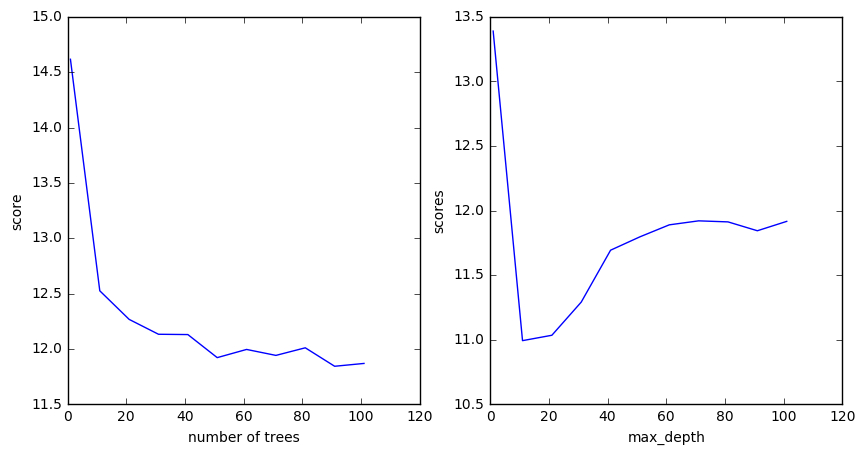

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range_n,scores_n)
plt.ylabel('score')
plt.xlabel('number of trees')

plt.subplot(122)
plt.plot(range_m,scores_m)
plt.ylabel('scores')
plt.xlabel('max_depth')

In [29]:
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(train_kobe, train_label)
predictions = model.predict(test_kobe)
test_shot_id = test_shot_id[pd.isnull(raw['shot_made_flag'])]
result=pd.DataFrame({'shot_id':test_shot_id['shot_id'].as_matrix(),'shot_made_flag':predictions.astype(np.int32)})
result.to_csv("result.csv", index=False)

In [30]:
result.head(10)

,shot_id,shot_made_flag
0,1,0
1,8,0
2,17,1
3,20,1
4,33,0
5,34,0
6,35,0
7,36,1
8,37,1
9,38,0
